In [273]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import plotly.colors
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [344]:
# Reading attendance data
df_frequentation = pd.read_csv('data/frequentation-gares.csv', sep=';')
# Reading train station data
df_gares = pd.read_csv('data/referentiel-gares-voyageurs.csv', sep=';')
df = df_gares.merge(
    right=df_frequentation, 
    left_on='Code UIC', 
    right_on='Code UIC complet', 
    how='inner')

# Reading found items data
df_items = pd.read_csv('data/objets-trouves-restitution.csv', sep=';')
df = df.merge(df_items, on='Code UIC', how='right')

In [345]:
# Filtering by date
df['Date'] = pd.to_datetime(df.Date, utc=True).dt.tz_convert('Europe/Paris')

In [346]:
df = df.loc[(df.Date.dt.year >= 2015) & (df.Date.dt.year <= 2018)]

df['Passengers'] =(df['Total Voyageurs 2018'] 
                    + df['Total Voyageurs 2017'] 
                    + df['Total Voyageurs 2016'] 
                    + df['Total Voyageurs 2015'])

df = (df.groupby(by="Intitulé gare")
        .agg({'Longitude WGS84': 'first',
              'Latitude WGS84': 'first',
              'Nature d\'objets': len,
              'Passengers': 'first'})
        .rename(columns={'Nature d\'objets': 'item_count'})
)

In [347]:
df['count_per_100kpax'] = df.item_count / df.Passengers * 1e5
df = df.sort_values(by='count_per_100kpax', ascending=False)

df = df[df.item_count >= 10]
df['group'] = pd.qcut(df['count_per_100kpax'], q=np.linspace(0, 1, 6))

In [348]:
df.sort_values('count_per_100kpax')

,Longitude WGS84,Latitude WGS84,item_count,Passengers,count_per_100kpax,group
Intitulé gare,,,,,,
Versailles Rive Droite,2.134752,48.809653,39,21309519.0,0.183017,"(0.182, 3.623]"
Poissy,2.041368,48.932901,80,43120958.0,0.185525,"(0.182, 3.623]"
Cergy le Haut,2.011872,49.048493,55,26956324.0,0.204034,"(0.182, 3.623]"
Saint-Cloud,2.216870,48.845410,69,33312044.0,0.207132,"(0.182, 3.623]"
Conflans-Sainte-Honorine,2.097830,48.996460,91,18585957.0,0.489617,"(0.182, 3.623]"
...,...,...,...,...,...,...
Quimper,-4.092103,47.994455,4629,3700023.0,125.107330,"(24.664, 323.36]"
Brest,-4.478903,48.388110,8549,6716665.0,127.280429,"(24.664, 323.36]"
Cherbourg,-1.621515,49.633505,2934,2236652.0,131.178207,"(24.664, 323.36]"


In [339]:
fig.write_html('sncf-found-items-map.html')

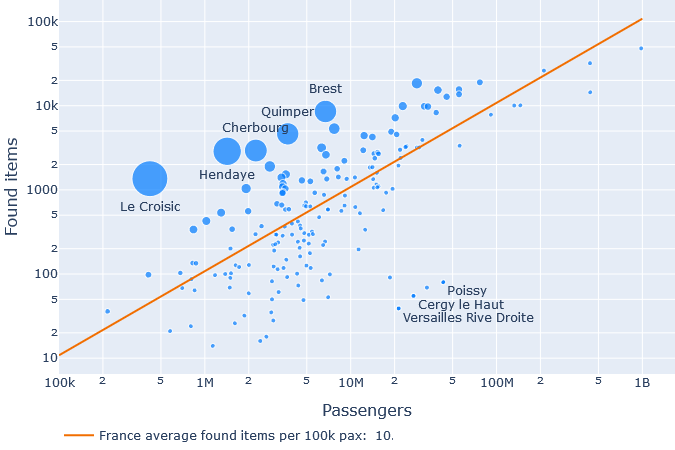

In [321]:
fig = go.Figure()

df_sub=df.iloc[5:]
fig.add_trace(go.Scatter(
    x=df_sub.Passengers,
    y=df_sub.item_count, 
    mode='markers',
    marker=dict(
        size=df_sub.count_per_100kpax,
        sizemode='area',
        sizemin=2.5,
        sizeref=1,
        color="#007bff"
    ),
    text=df_sub.index,
    hovertemplate="%{text}<br>" 
                    + "Found items: %{y}<br>" 
                    + "Passengers: %{x}<br>"
                    + "Found items per 100k passengers: %{marker.size:.1f}",
    name="",
    showlegend=False,
))

df_sub=df.iloc[2:5]
fig.add_trace(go.Scatter(
    x=df_sub.Passengers,
    y=df_sub.item_count, 
    mode='markers+text',
    marker=dict(
        size=df_sub.count_per_100kpax,
        sizemode='area',
        sizemin=2.5,
        sizeref=.5,
        color="#007bff"
    ),
    text=df_sub.index,
    textposition='top center',
    hovertemplate="%{text}<br>" 
                    + "Found items: %{y}<br>" 
                    + "Passengers: %{x}<br>"
                    + "Found items per 100k passengers: %{marker.size:.1f}",
    name="",
    showlegend=False,
))

df_sub=df.iloc[:2]
fig.add_trace(go.Scatter(
    x=df_sub.Passengers,
    y=df_sub.item_count, 
    mode='markers+text',
    marker=dict(
        size=df_sub.count_per_100kpax,
        sizemode='area',
        sizemin=2.5,
        sizeref=.5,
        color="#007bff"
    ),
    text=df_sub.index,
    textposition='bottom center',
    hovertemplate="%{text}<br>" 
                    + "Found items: %{y:d}<br>" 
                    + "Passengers: %{x}<br>"
                    + "Found items per 100k passengers: %{marker.size:.1f}",
    name="",
    showlegend=False,
))

df_sub=df.iloc[-3:]
fig.add_trace(go.Scatter(
    x=df_sub.Passengers,
    y=df_sub.item_count, 
    mode='markers+text',
    marker=dict(
        size=df_sub.count_per_100kpax,
        sizemode='area',
        sizemin=2.5,
        sizeref=.5,
        color="#007bff"
    ),
    text=df_sub.index,
    textposition='bottom right',
    hovertemplate="%{text}<br>" 
                    + "Found items: %{y:d}<br>" 
                    + "Passengers: %{x}<br>"
                    + "Found items per 100k passengers: %{marker.size:.1f}",
    name="",
    showlegend=False,
))

fig.add_trace(go.Scatter(
    x=np.logspace(5, 9, 10),
    y=np.logspace(5, 9, 10) * df.item_count.sum() / df.Passengers.sum(),
    mode='lines',
    name=f'France average found items per 100k pax: {df_stations.item_count.sum() / df_stations.Passengers.sum() * 1e5: .1f}',
    hoverinfo='skip',
    marker=dict(color="#F16E00")
))

fig.update_layout(
    margin={'l': 0, 'r': 0, 't': 0, 'b': 0},
    xaxis=dict(type='log', title_text="Passengers", titlefont=dict(size=16)),
    yaxis=dict(type='log', title_text="Found items", titlefont=dict(size=16)),
    legend=dict(orientation='h', y=-.125)
)

fig.show(config={'scrollZoom': True,  "displayModeBar": False})